In [163]:
#importing Required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [338]:
#import Dataset
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/startup_funding.csv')


In [339]:
#First view of the dataset
df.head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [340]:
#check the dimension of the dataset
df.shape

(3044, 10)

In [341]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [342]:
#Check for Null values
(df.isna().sum()/df.shape[0])*100

Sr No                 0.000000
Date dd/mm/yyyy       0.000000
Startup Name          0.000000
Industry Vertical     5.617608
SubVertical          30.749014
City  Location        5.913272
Investors Name        0.788436
InvestmentnType       0.131406
Amount in USD        31.537451
Remarks              86.235217
dtype: float64

In [343]:
#check for duplicate values
df.duplicated().value_counts()

False    3044
dtype: int64

In [344]:
#Drop Remark column as it consists more than 80% Nan values
df.drop(columns=['Remarks'],inplace=True)

In [345]:
# Set 'Sr No' as the index of the DataFrame
df.set_index('Sr No', inplace=True)

In [346]:
# Rename the columns of the DataFrame
df.rename(columns={
    'Date dd/mm/yyyy': 'date',
    'Startup Name': 'startup',
    'Industry Vertical': 'vertical',
    'SubVertical': 'subvertical',
    'City  Location': 'city',
    'Investors Name': 'investors',
    'InvestmentnType': 'inv_type',
    'Amount in USD': 'amount(CR)'
}, inplace=True)

In [347]:
# Fill missing values in the 'vertical' column with the most frequent value
df['vertical'] = df['vertical'].fillna(df['vertical'].mode()[0])

# Fill missing values in the 'subvertical' column with the most frequent value
df['subvertical'] = df['subvertical'].fillna(df['subvertical'].mode()[0])

# Fill missing values in the 'city' column with the most frequent value
df['city'] = df['city'].fillna(df['city'].mode()[0])

# Fill missing values in the 'investors' column with the most frequent value
df['investors'] = df['investors'].fillna(df['investors'].mode()[0])

# Fill missing values in the 'inv_type' column with the most frequent value
df['inv_type'] = df['inv_type'].fillna(df['inv_type'].mode()[0])


In [348]:
# Fill missing values in the 'amount(CR)' column with '0'
df['amount(CR)'] = df['amount(CR)'].fillna('0')

# Remove commas from the 'amount(CR)' column
df['amount(CR)'] = df['amount(CR)'].str.replace(",", "")

# Replace strings 'undisclosed', 'unknown', and 'Undisclosed' with '0'
df['amount(CR)'] = df['amount(CR)'].str.replace("undisclosed", "0")
df['amount(CR)'] = df['amount(CR)'].str.replace("unknown", "0")
df['amount(CR)'] = df['amount(CR)'].str.replace("Undisclosed", "0")

In [349]:
# Filter the DataFrame to only include rows where the 'amount(CR)' column contains digits
df = df[df['amount(CR)'].str.isdigit()]

# Convert the 'amount(CR)' column to a float data type
df['amount(CR)'] = df['amount(CR)'].astype('float')

<ipython-input-349-d6e917abdee3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount(CR)'] = df['amount(CR)'].astype('float')


In [350]:
def To_inr(dollar):
  """
  Converts a dollar amount to Indian rupees (INR) in crores.

  Args:
      dollar: The dollar amount.

  Returns:
      The INR amount in crores.
  """

  inr = dollar * 82.5
  return inr / 10000000

In [351]:
df['amount(CR)']=df['amount(CR)'].apply(To_inr)
df

,date,startup,vertical,subvertical,city,investors,inv_type,amount(CR)
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...
3040,29/01/2015,Printvenue,Consumer Internet,Online Lending Platform,Bangalore,Asia Pacific Internet Group,Private Equity,37.125000
3041,29/01/2015,Graphene,Consumer Internet,Online Lending Platform,Bangalore,KARSEMVEN Fund,Private Equity,6.806250
3042,30/01/2015,Mad Street Den,Consumer Internet,Online Lending Platform,Bangalore,"Exfinity Fund, GrowX Ventures.",Private Equity,12.375000


In [352]:
# Replace incorrect date formats in the 'date' column of dataframe 'df'

# Replace "05/072018" with "05/07/2018"
df['date'] = df['date'].replace("05/072018", "05/07/2018")

# Replace "01/07/015" with "01/07/2015"
df['date'] = df['date'].replace("01/07/015", "01/07/2015")

# Replace "22/01//2015" with "22/01/2015"
df['date'] = df['date'].replace("22/01//2015", "22/01/2015")

# Replace "01/07/015" with "01/07/2015"
df['date'] = df['date'].replace("01/07/015", "01/07/2015")

In [353]:
# Convert the 'date' column in dataframe 'df' to datetime format, handling errors with 'coerce'

df['date'] = pd.to_datetime(df['date'], errors='coerce')

<ipython-input-353-dd7db83f19d6>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [354]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3029 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     3029 non-null   object        
 3   subvertical  3029 non-null   object        
 4   city         3029 non-null   object        
 5   investors    3029 non-null   object        
 6   inv_type     3029 non-null   object        
 7   amount(CR)   3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [360]:
df['startup']

Sr No
1                             BYJU’S
2                             Shuttl
3                          Mamaearth
4       https://www.wealthbucket.in/
5                             Fashor
                    ...             
3040                      Printvenue
3041                        Graphene
3042                  Mad Street Den
3043                       Simplotel
3044                couponmachine.in
Name: startup, Length: 3029, dtype: object

In [356]:
# Filter rows where startup name starts with "Ola" but doesn't end with it
ola_mask = df['startup'].str.startswith('Ola') & ~df['startup'].str.endswith('Ola')

# Update startup name for filtered rows
df.loc[ola_mask, 'startup'] = 'Ola'

# Verify the changes
df[df['startup'].str.startswith('Ola')]
# If you want to update the DataFrame in-place, you can directly use:
df.loc[ola_mask, 'startup'] = 'Ola'

In [357]:
# Filter rows where startup name starts with "Ola" but doesn't end with it
rapido_mask = df['startup'].str.startswith('Rapido') & ~df['startup'].str.endswith('Rapido')

# Update startup name for filtered rows
df.loc[rapido_mask, 'startup'] = 'Rapido'

# If you want to update the DataFrame in-place, you can directly use:
df.loc[rapido_mask, 'startup'] = 'Rapido'

In [358]:
# Verify the changes
df[df['startup'].str.startswith('Rapido')]

,date,startup,vertical,subvertical,city,investors,inv_type,amount(CR)
Sr No,,,,,,,,
61,2019-08-27,Rapido,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,32175.000000
504,2017-11-21,Rapido,Technology,Bike and Taxi pooling online platform,Hyderabad,"Skycatcher Fund, Aravind Sanka",Seed/Angel Funding,2.716147
622,2017-09-25,Rapido,Consumer Internet,Bike Aggregator Mobile App,Bangalore,Battery Road Digital Holdings LLC,Seed Funding,3.481500
1781,2016-04-18,Rapido,Consumer Internet,Bike Aggregator App,Bangalore,"Pawan Munjal, AdvantEdge Partners, Astarc Vent...",Private Equity,0.000000


In [365]:
df['startup'].replace({
    "Byju\\xe2\\x80\\x99s":"BYJU'S",
    "BYJU\\xe2\\x80\\x99s":"BYJU'S",
    "BYJU\\\\\'S":"BYJU'S"
      # Add more variations if needed
},inplace=True)

In [361]:
df['startup']=df['startup'].str.replace("https://www.wealthbucket.in/","wealthbucket")

<ipython-input-361-43591a46519b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['startup']=df['startup'].str.replace("https://www.wealthbucket.in/","wealthbucket")


In [367]:
df.to_csv("startup_cleaned.csv",index=False)

In [366]:
sorted(df['startup'].unique().tolist())

['"BYJU\\\\\'S"',
 '#Fame',
 '121Policy',
 '19th mile',
 '1Crowd',
 '1mg',
 '1mg (Healthkartplus)',
 '20Dresses',
 '33Coupons',
 '360Ride',
 '3Dexter',
 '3HCare',
 '3rdFlix',
 '48East',
 '4tigo',
 '5th Vital',
 '6Degree',
 '75F',
 '91SpringBoard',
 '99Games',
 '99PerHour',
 '9Stacks',
 'A&R Bon Vivants',
 'ABI Health',
 'AEON Learning',
 'AHA Taxis',
 'AYE Finance',
 'AadharAPI.com',
 'Aadyah',
 'Aahaa',
 'Aahaa Stores',
 'Aarav UAV',
 'Aasaanjobs',
 'Aashiyaan',
 'Aavishkaar-Intellecap Group',
 'AbeRuk',
 'Abhibus',
 'Absentia',
 'Absentia VR',
 'Ace Turtle',
 'Ace2three',
 'Acko',
 'ActOnMagic',
 'Actionable Analytics',
 'Active AI',
 'Active.ai',
 'Actofit',
 'Ad2pro',
 'AdPushUp',
 'AdStringO',
 'AdUrCup',
 'AdWyze',
 'Address Health',
 'AdmitKard',
 'Advanced Structures India',
 'Advantage Club',
 'Advenio',
 'Adytude',
 'Aequm',
 'AerMed',
 'Affimity',
 'Affordplan',
 'Agara Labs',
 'AgentDesks',
 'Agricxlab',
 'Agrostar',
 'Agrowave',
 'AirCTO',
 'AirMed Labs',
 'AirZaar',
 'Air

In [287]:
sorted(set(df['investors'].str.split(",").sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [102]:
df[df['investors'].str.contains("3one4 Capital")].head()[['date','startup','vertical','city','amount(CR)']]

,date,startup,vertical,city,amount(CR)
Sr No,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,29.628844
760,2017-06-19,DarwinBox,Technology,Hyderabad,33.000000
985,2017-03-29,Licious,ECommerce,Bangalore,82.500000
1157,2016-12-15,Pocket Aces,Technology,Mumbai,24.750000
1194,2016-03-11,DoSelect,Consumer Internet,Bangalore,0.000000


In [103]:
df[df['investors'].str.contains("3one4 Capital")].groupby('startup')['amount(CR)'].sum().sort_values(ascending=False)

startup
Licious        82.500000
DarwinBox      33.000000
Tripoto        29.628844
Pocket Aces    24.750000
DoSelect        0.000000
Name: amount(CR), dtype: float64

<Axes: ylabel='amount(CR)'>

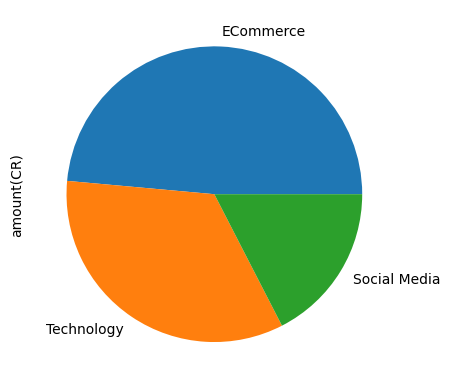

In [104]:
df[df['investors'].str.contains("3one4 Capital")].groupby('vertical')['amount(CR)'].sum().sort_values(ascending=False).plot(kind='pie')

<Axes: ylabel='amount(CR)'>

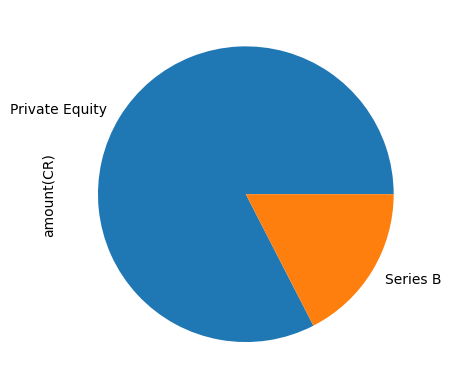

In [105]:
df[df['investors'].str.contains("3one4 Capital")].groupby('inv_type')['amount(CR)'].sum().sort_values(ascending=False).plot(kind='pie')

<Axes: ylabel='amount(CR)'>

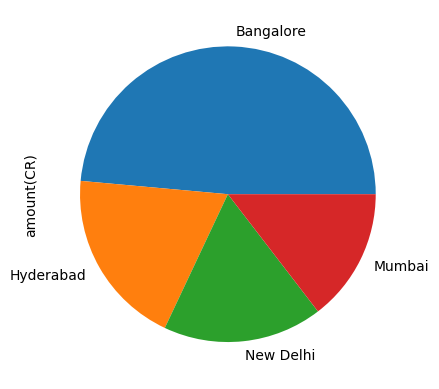

In [106]:
df[df['investors'].str.contains("3one4 Capital")].groupby('city')['amount(CR)'].sum().sort_values(ascending=False).plot(kind='pie')

In [107]:
df['year']=df['date'].dt.year

<ipython-input-107-e38ecc4b8ae0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['date'].dt.year


<Axes: xlabel='year'>

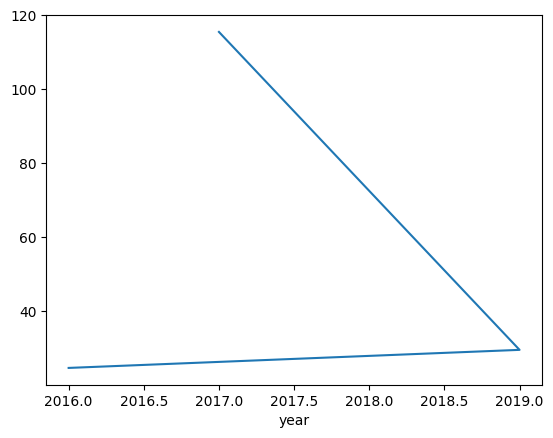

In [108]:
df[df['investors'].str.contains("3one4 Capital")].groupby('year')['amount(CR)'].sum().sort_values(ascending=False).plot()

#Overall Analysis

In [109]:
round(df['amount(CR)'].sum())

296492

In [110]:
df.groupby('startup')['amount(CR)'].max().sort_values(ascending=False).head(1).values[0]

32175.0

In [111]:
df.groupby('startup')['amount(CR)'].sum().mean()

128.96554857057416

In [112]:
df['startup'].nunique()

2299

In [113]:
df['month']=df['date'].dt.month

<ipython-input-113-257bfd7ee078>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['date'].dt.month


In [114]:
df.groupby(['year','month'])['startup'].count().reset_index()

,year,month,startup
0,2015,1,35
1,2015,2,14
2,2015,3,36
3,2015,4,65
4,2015,5,53
...,...,...,...
58,2019,12,10
59,2020,1,2
60,2020,2,2
61,2020,9,2


In [115]:
temp_df=df.groupby(['year','month'])['amount(CR)'].sum().reset_index()

In [118]:
temp_df['x_val']=temp_df['year'].astype('str')+ '-' +temp_df['month'].astype('str')
temp_df

,year,month,amount(CR),x_val
0,2015,1,5274.637500,2015-1
1,2015,2,1567.178250,2015-2
2,2015,3,1910.658750,2015-3
3,2015,4,4511.058750,2015-4
4,2015,5,1401.427500,2015-5
...,...,...,...,...
58,2019,12,3667.125000,2019-12
59,2020,1,140.649250,2020-1
60,2020,2,39.600000,2020-2
61,2020,9,1801.460595,2020-9


In [72]:
df.groupby(['year','month'])['amount(CR)'].sum().reset_index()

,year,month,amount(CR)
0,2015,1,5274.637500
1,2015,2,1567.178250
2,2015,3,1910.658750
3,2015,4,4511.058750
4,2015,5,1401.427500
...,...,...,...
58,2019,12,3667.125000
59,2020,1,140.649250
60,2020,2,39.600000
61,2020,9,1801.460595


In [368]:
# Sector analysis by count
sector_counts = df['vertical'].value_counts()
# Select top sectors based on count
top_sectors_count = sector_counts.head(5)

<Axes: ylabel='vertical'>

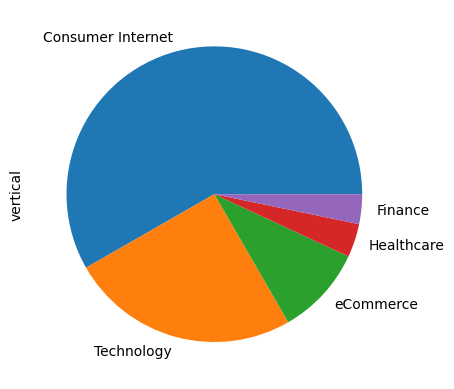

In [370]:
top_sectors_count.plot(kind='pie')

In [371]:
# Sector analysis by sum
sector_sums = df.groupby('vertical')['amount(CR)'].sum()
# Select top sectors based on sum
top_sectors_sum = sector_sums.head(5)

<Axes: ylabel='amount(CR)'>

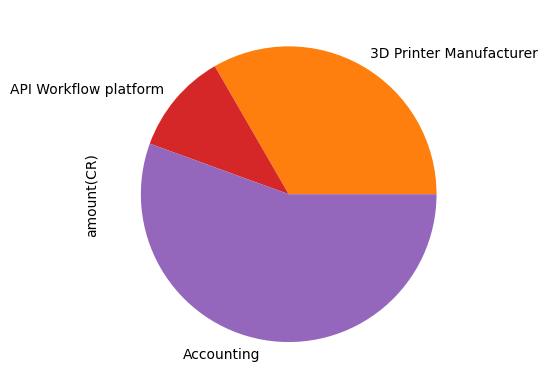

In [373]:
top_sectors_sum.plot(kind='pie')

Text(0.5, 1.0, 'Type of Funding')

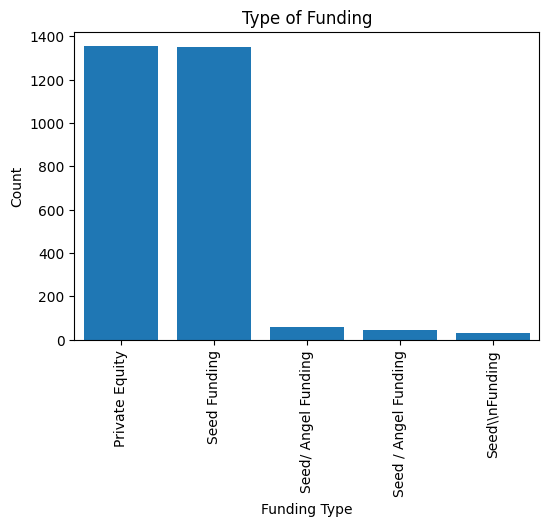

In [374]:
funding_types = df['inv_type'].value_counts().head(5)
fig8, ax8 = plt.subplots(figsize=(6,4))
ax8.bar(funding_types.index,funding_types.values)
funding_types.plot(kind='bar')
plt.xlabel('Funding Type')
plt.ylabel('Count')
plt.title('Type of Funding')


Text(0.5, 1.0, 'Funded Cities')

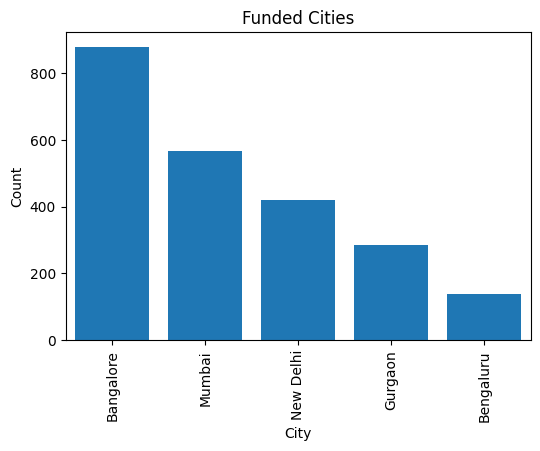

In [376]:
funded_city = df['city'].value_counts().head(5)
fig9, ax9 = plt.subplots(figsize=(6, 4))
ax9.bar(funded_city.index, funded_city.values)
funded_city.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Funded Cities')


In [379]:
df['year']=df['date'].dt.year
top_startups_year_wise = df.groupby(['year', 'startup'])['amount(CR)'].sum().reset_index()
top_startups_year_wise

,year,startup,amount(CR)
0,2015,#Fame,82.500000
1,2015,1mg (Healthkartplus),49.500000
2,2015,20Dresses,8.250000
3,2015,33Coupons,0.165000
4,2015,6Degree,0.000000
...,...,...,...
2821,2020,Mamaearth,151.460595
2822,2020,Pando,74.250000
2823,2020,Shuttl,66.399250
2824,2020,Zomato,1237.500000


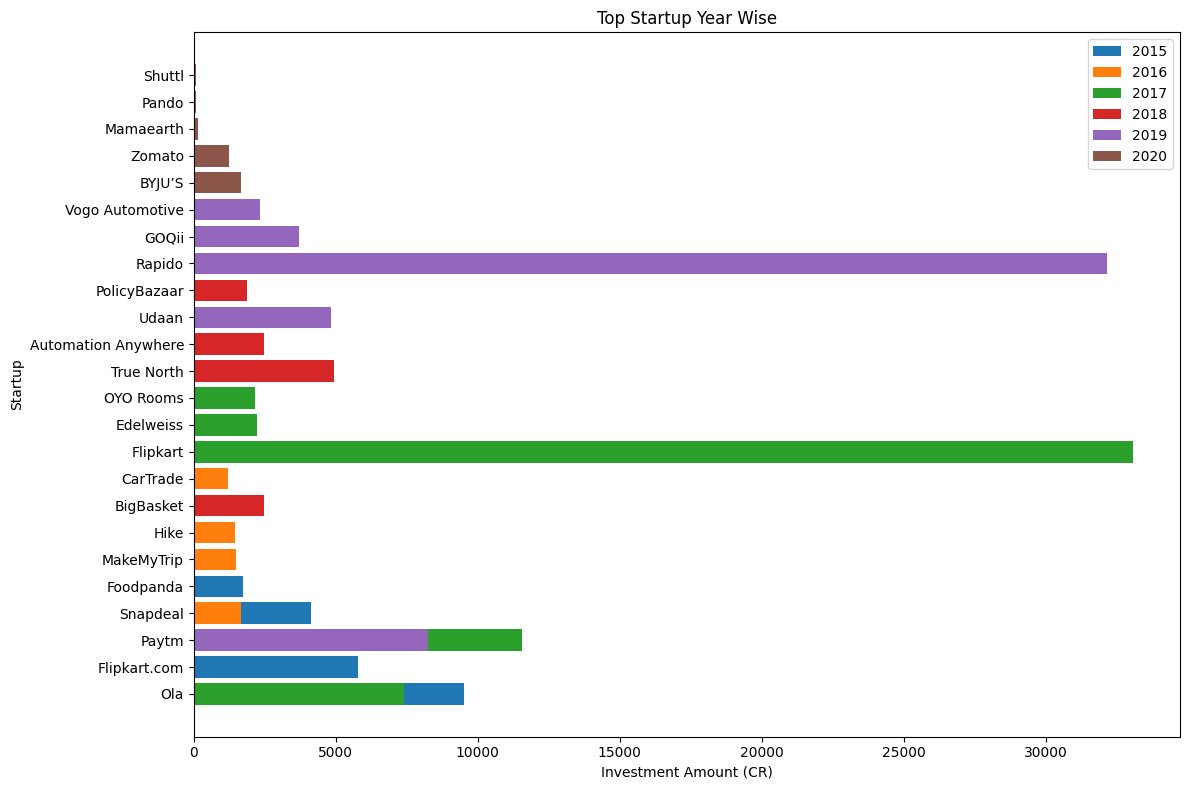

In [380]:
# Add Top Startups year-wise analysis

top_startups_year_wise = df.groupby(['year', 'startup'])['amount(CR)'].sum().reset_index()
top_startups_year_wise = top_startups_year_wise.sort_values(by=['year', 'amount(CR)'], ascending=[True, False])

# Select top 5 startups for each year
top_5_startups_year_wise = top_startups_year_wise.groupby('year').head(5)

fig10, ax10 = plt.subplots(figsize=(12, 8))  # Increase the figure size
for year, data in top_5_startups_year_wise.groupby('year'):
    ax10.barh(data['startup'], data['amount(CR)'], label=str(year))  # Use barh for horizontal bar chart

ax10.legend()
plt.xlabel('Investment Amount (CR)')
plt.ylabel('Startup')
plt.title('Top Startup Year Wise')
plt.tight_layout()  # Adjust layout to prevent overlap



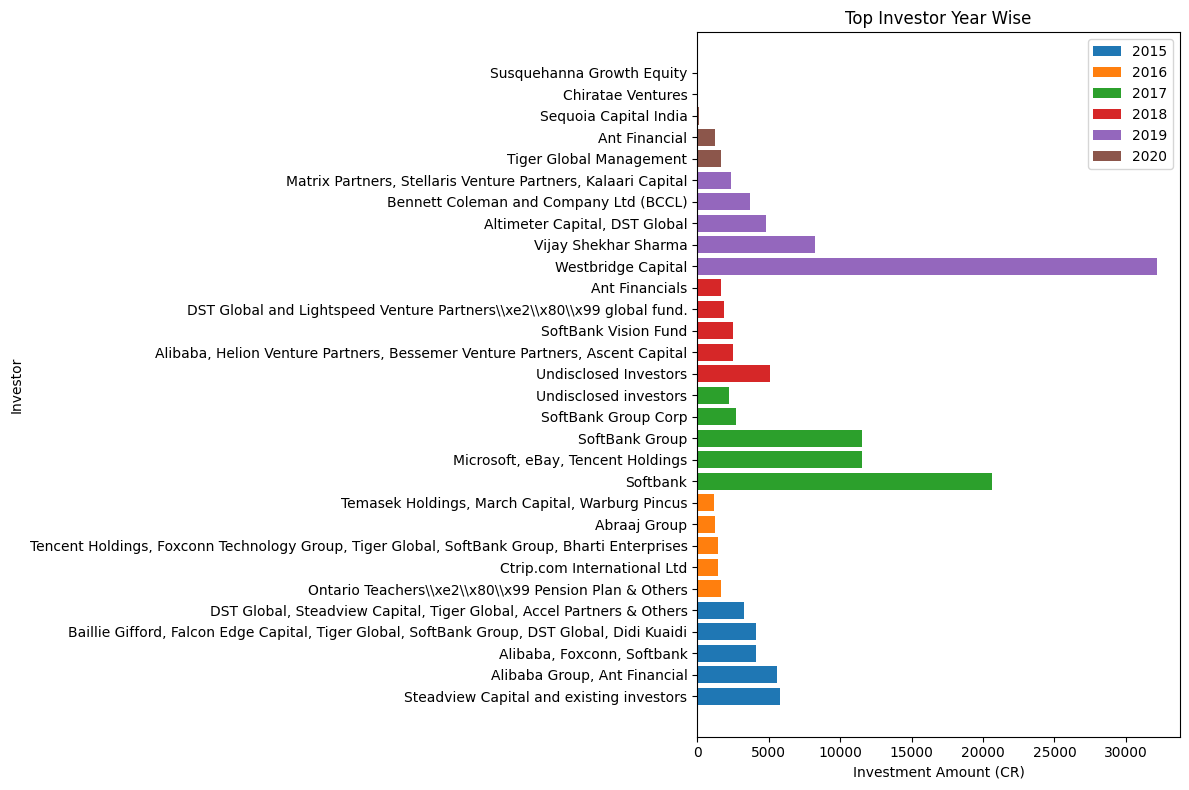

In [381]:
# Add Top Investors analysis

top_investors_year_wise = df.groupby(['year', 'investors'])['amount(CR)'].sum().reset_index()
top_investors_year_wise = top_investors_year_wise.sort_values(by=['year', 'amount(CR)'], ascending=[True, False])

# Select top 5 investors for each year
top_5_investors_year_wise = top_investors_year_wise.groupby('year').head(5)

fig11, ax11 = plt.subplots(figsize=(12, 8))  # Increase the figure size
for year, data in top_5_investors_year_wise.groupby('year'):
    ax11.barh(data['investors'], data['amount(CR)'], label=str(year))  # Use barh for horizontal bar chart

ax11.legend()
plt.xlabel('Investment Amount (CR)')
plt.ylabel('Investor')
plt.title('Top Investor Year Wise')
plt.tight_layout()  # Adjust layout to prevent overlap

